# Importation des données

In [ ]:
!git clone https://github.com/axelcarlier/animals.git

In [1]:
from utils.affichage import *

In [2]:
import PIL
from PIL import Image
import numpy as np
import os
import re

# Chemin vers la base de données
path = "./animals/unlabelled/"
# Indice d'ajout de données dans les variables x et y 
i = 0
# Préparation des structures de données pour x et y
x = np.zeros((50000, 64, 64, 3))

# Parcours des fichiers (classés) du répertoire
dirs = os.listdir(path)

# Trier les fichiers par nom alphanumérique
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)
dirs = sorted_alphanumeric(dirs)

for item in dirs:
  # Image : on va remplir la variable x
  # Lecture de l'image
  img = Image.open(path + item)
  # Remplissage de la variable x
  x[i] = np.asarray(img)
  i = i+1

x = x.astype('uint8')

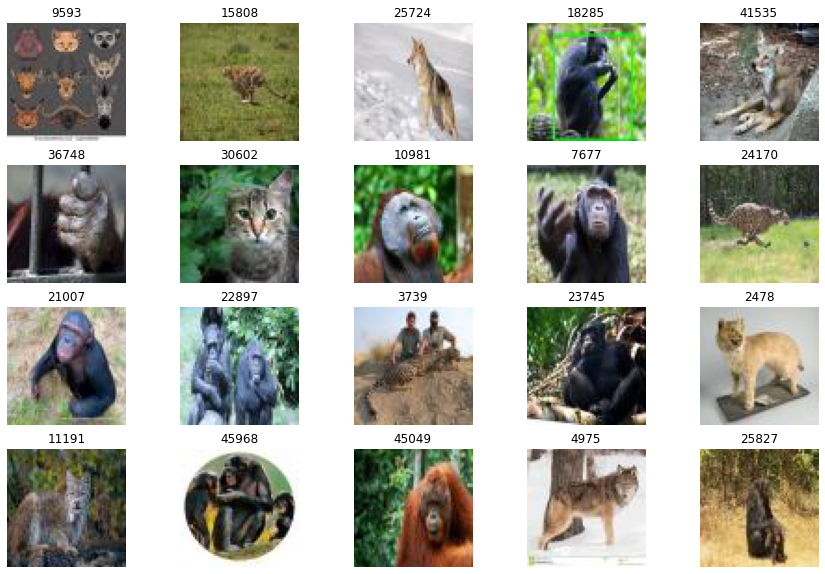

In [3]:
# Visualiser la base de données
import matplotlib.pyplot as plt
from PIL import Image

fig = plt.figure(figsize=(15, 10))

for i in range(20):
  num = np.random.randint(x.shape[0])
  plt.subplot(4, 5, i+1)
  plt.imshow(x[num]);
  plt.title(str(num+1))
  plt.axis('off')
plt.show()


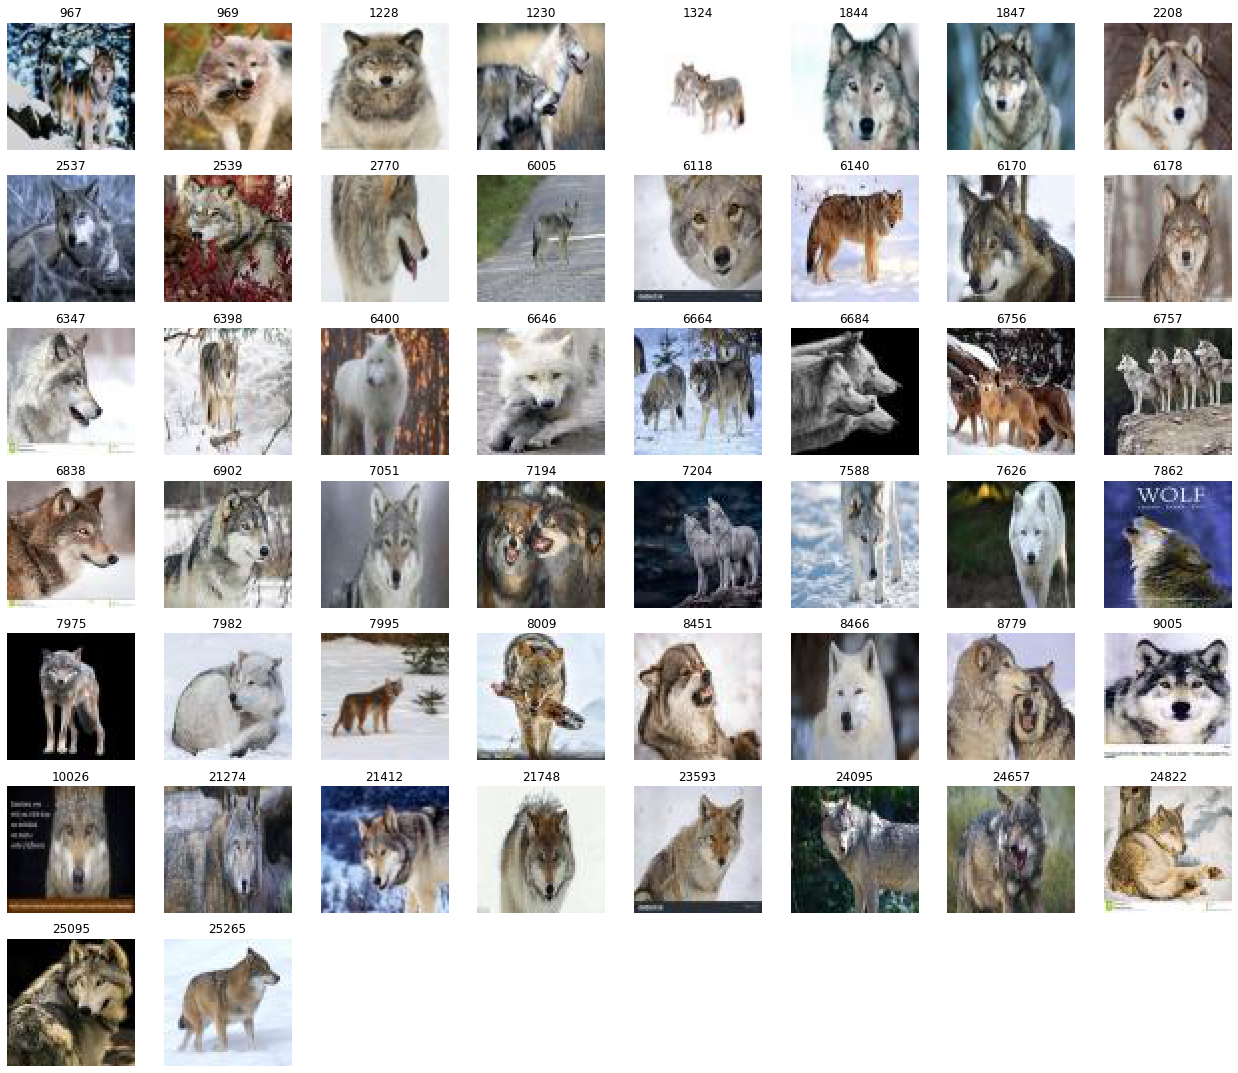

In [4]:
afficher_txt("imagestolabel/loup.txt",x)

In [11]:
i = 6001

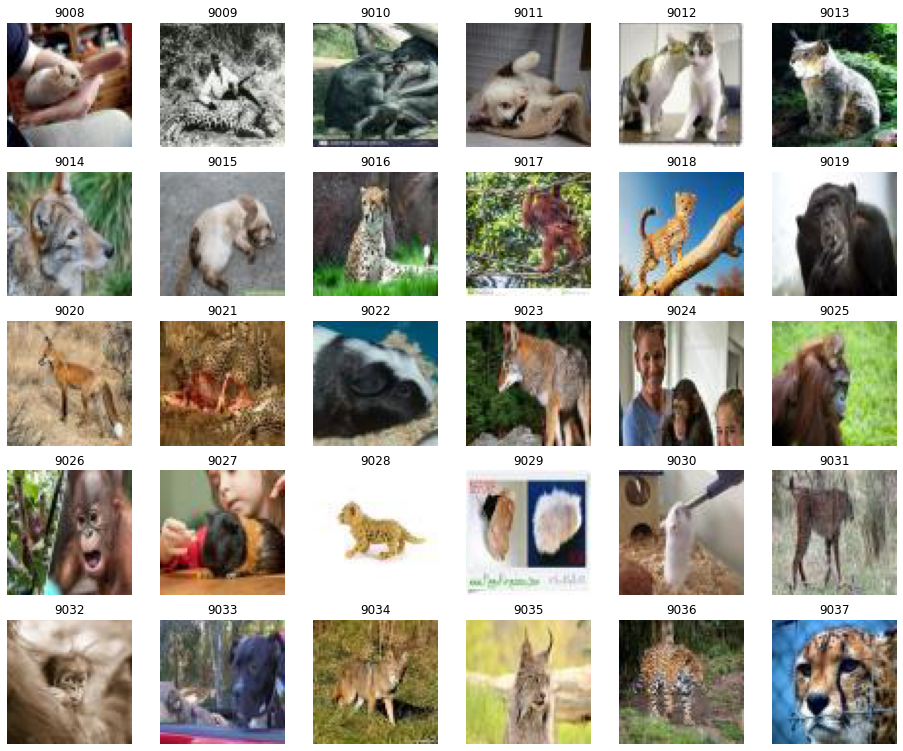

In [111]:
afficher_liste(list(range(i,i+30)))
i += 31

In [12]:
for fichier in os.listdir('imagestolabel/') :
    name = fichier.split('.')[0]
    os.mkdir('animals/fromclass/'+name)

In [20]:
from shutil import copy

for fichier in os.listdir('imagestolabel/') :
    name = fichier.split('.')[0]
    directory = 'animals/fromclass/'+ name
    file = open('imagestolabel/'+fichier,'r')
    lignes = file.readlines()
    for ligne in lignes :
        numero = ligne.rstrip("\n")
        copy('animals/unlabelled/img'+numero+'.jpg',directory)
        break
    

FileNotFoundError: [Errno 2] No such file or directory: 'animals/unlabelled/6471'